In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib as mpl
import matplotlib.ticker as mtick

# Set publication-quality visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern Roman', 'Times', 'Palatino']
mpl.rcParams['font.size'] = 11
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['figure.titlesize'] = 16
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['savefig.dpi'] = 300

# Define colors for different network types (colorblind-friendly palette)
NETWORK_COLORS = {
    'scale-free': '#e41a1c',    # red
    'small-world': '#377eb8',   # blue
    'random': '#4daf4a'         # green
}

# Define better color scheme
SUPPORTER_COLOR = '#1b9e77'  # teal
UNDECIDED_COLOR = '#7570b3'  # purple
OPPOSITION_COLOR = '#d95f02'  # orange

# Define distinctive colors for early vs late campaign
EARLY_COLOR = '#e41a1c'  # bright red
LATE_COLOR = '#377eb8'   # blue


In [31]:
# Load the experiment results
pkl_path = "/Users/jessebafernando/Dropbox/NetSci/dynamicalprocesses/final_proj/results/timing/timing_20250411_142232_n_nodes_1000_shock_duration_20_total_steps_150.pkl"
with open(pkl_path, 'rb') as f:
    data = pickle.load(f)

# Extract results
results = data['results']
timing_strategies = list(results.keys())
config = data.get('config', {})
shock_duration = config.get('shock_duration', 20)



Early Campaign:
  Initial - Supporters: 0.293, Undecided: 0.403, Opposition: 0.304
  Final - Supporters: 0.515, Undecided: 0.054, Opposition: 0.431
  Change in supporters: 0.222

Late Campaign:
  Initial - Supporters: 0.288, Undecided: 0.396, Opposition: 0.316
  Final - Supporters: 0.464, Undecided: 0.041, Opposition: 0.495
  Change in supporters: 0.176


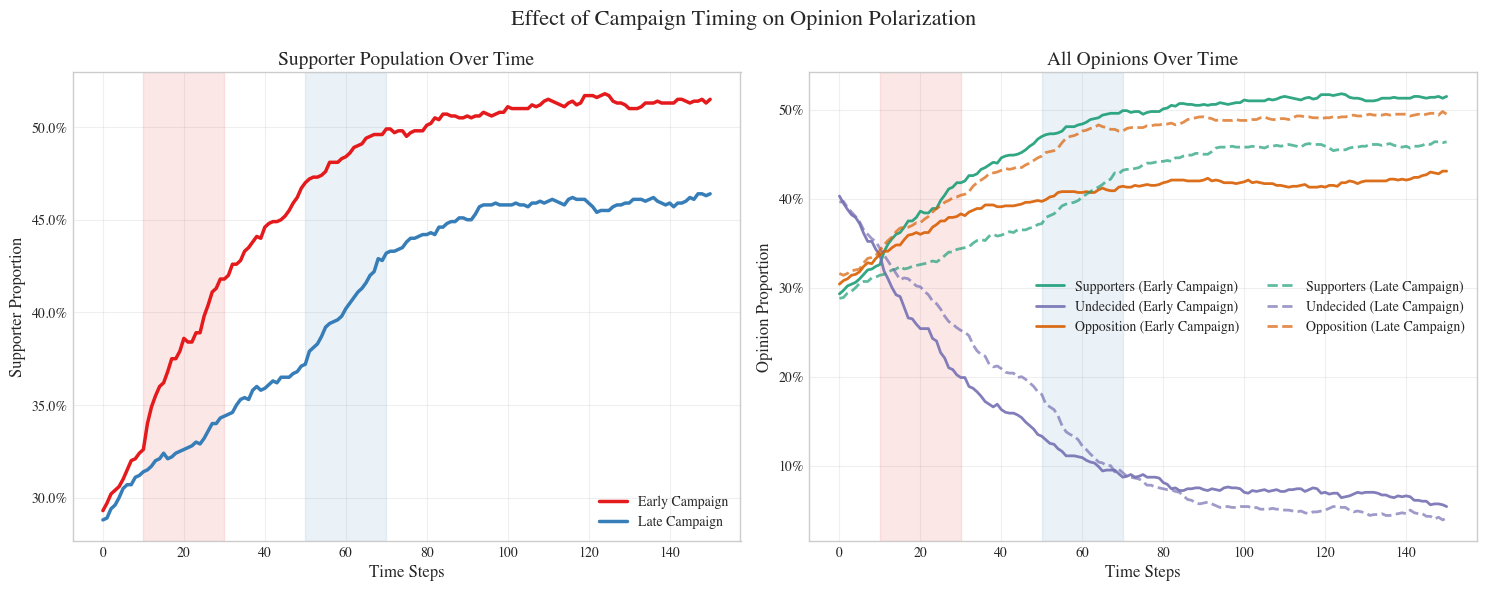

In [41]:
# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Process each timing strategy
for timing in timing_strategies:
    history = results[timing]['history']
    
    # CORRECT mapping
    supporters = [h[0] for h in history]
    undecided = [h[1] for h in history]
    opposition = [h[2] for h in history]
    
    shock_start = 10 if 'Early' in timing else 50
    shock_end = shock_start + shock_duration
    timing_color = EARLY_COLOR if 'Early' in timing else LATE_COLOR
    
    # Plot supporter population
    ax1.plot(supporters, label=f"{timing}", linewidth=2.5, color=timing_color)
    ax1.axvspan(shock_start, shock_end, alpha=0.1, color=timing_color)
    
    # Print key metrics
    print(f"\n{timing}:")
    print(f"  Initial - Supporters: {supporters[0]:.3f}, Undecided: {undecided[0]:.3f}, Opposition: {opposition[0]:.3f}")
    print(f"  Final - Supporters: {supporters[-1]:.3f}, Undecided: {undecided[-1]:.3f}, Opposition: {opposition[-1]:.3f}")
    print(f"  Change in supporters: {supporters[-1] - supporters[0]:.3f}")
    
    # Plot all opinion states
    linestyle = '-' if 'Early' in timing else '--'
    alpha = 0.9 if 'Early' in timing else 0.7
    
    ax2.plot(supporters, label=f"Supporters ({timing})", color=SUPPORTER_COLOR, linestyle=linestyle, alpha=alpha, linewidth=2)
    ax2.plot(undecided, label=f"Undecided ({timing})", color=UNDECIDED_COLOR, linestyle=linestyle, alpha=alpha, linewidth=2)
    ax2.plot(opposition, label=f"Opposition ({timing})", color=OPPOSITION_COLOR, linestyle=linestyle, alpha=alpha, linewidth=2)
    ax2.axvspan(shock_start, shock_end, alpha=0.1, color=timing_color)

# Configure axes
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Supporter Proportion')
ax1.set_title('Supporter Population Over Time', fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax2.set_xlabel('Time Steps')
ax2.set_ylabel('Opinion Proportion')
ax2.set_title('All Opinions Over Time', fontweight='bold')
ax2.legend(loc='best', ncol=2)
ax2.grid(True, alpha=0.3)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.suptitle('Effect of Campaign Timing on Opinion Polarization', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('Campaign_Timing.pdf')
plt.show()


Early Campaign supporter gain: 0.222
Late Campaign supporter gain: 0.176


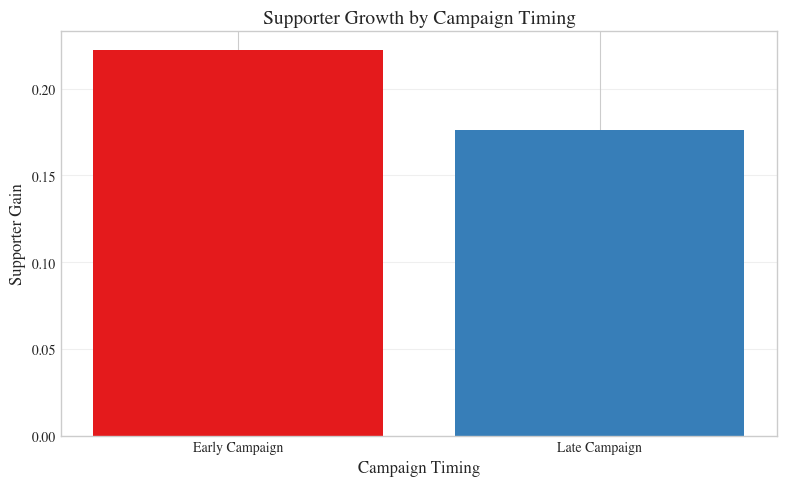

In [42]:
# Bar chart showing supporter gains
plt.figure(figsize=(8, 5))
supporter_gains = []

for timing in timing_strategies:
    history = results[timing]['history']
    supporters = [h[0] for h in history]
    supporter_gains.append(supporters[-1] - supporters[0])
    print(f"{timing} supporter gain: {supporters[-1] - supporters[0]:.3f}")

plt.bar(timing_strategies, supporter_gains, color=[EARLY_COLOR, LATE_COLOR])
plt.xlabel('Campaign Timing')
plt.ylabel('Supporter Gain')
plt.title('Supporter Growth by Campaign Timing', fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('Supporter_Growth_by_Campaign_Timing.pdf')
plt.show()

# Blitz versus Sustained

In [52]:
# Pattern-specific colors (colorblind-friendly)
PATTERN_COLORS = {
    'No Intervention': '#000000',         # black
    'Blitz (10 steps)': '#e41a1c',        # red
    'Medium (20 steps)': '#377eb8',       # blue
    'Sustained (40 steps)': '#4daf4a',    # green  
    'Ultra-sustained (60 steps)': '#984ea3' # purple
}

In [53]:
# Load the experiment results
pkl_path = "/Users/jessebafernando/Dropbox/NetSci/dynamicalprocesses/final_proj/results/blitz_vs_sustained/blitz_vs_sustained_20250411_142701_n_nodes_1000_total_steps_150.pkl"
with open(pkl_path, 'rb') as f:
    data = pickle.load(f)

# Load summary json
summary_path = "/Users/jessebafernando/Dropbox/NetSci/dynamicalprocesses/final_proj/results/blitz_vs_sustained_summary.json"
with open(summary_path, 'r') as f:
    summary = json.load(f)

# Extract results
results = data['results']
network_types = list(results.keys())

In [54]:
# Check data structure
first_network = network_types[0]
first_pattern = list(results[first_network].keys())[0]
first_history = results[first_network][first_pattern]['history']
first_timepoint = first_history[0]
print(f"Data structure check - first timepoint: {first_timepoint}")
print(f"Network types: {network_types}")
print(f"Patterns in first network: {list(results[first_network].keys())}")


Data structure check - first timepoint: {0: 0.32, 1: 0.379, 2: 0.301}
Network types: ['Scale-free', 'Small-world', 'Random']
Patterns in first network: ['No Intervention', 'Blitz (10 steps)', 'Medium (20 steps)', 'Sustained (40 steps)', 'Ultra-sustained (60 steps)']



Scale-free - No Intervention:
  Initial - Supporters: 0.320, Undecided: 0.379, Opposition: 0.301
  Final - Supporters: 0.491, Undecided: 0.063, Opposition: 0.446
  Change in supporters: 0.171

Scale-free - Blitz (10 steps):
  Initial - Supporters: 0.286, Undecided: 0.405, Opposition: 0.309
  Final - Supporters: 0.438, Undecided: 0.035, Opposition: 0.527
  Change in supporters: 0.152

Scale-free - Medium (20 steps):
  Initial - Supporters: 0.301, Undecided: 0.394, Opposition: 0.305
  Final - Supporters: 0.590, Undecided: 0.029, Opposition: 0.381
  Change in supporters: 0.289

Scale-free - Sustained (40 steps):
  Initial - Supporters: 0.294, Undecided: 0.398, Opposition: 0.308
  Final - Supporters: 0.506, Undecided: 0.038, Opposition: 0.456
  Change in supporters: 0.212

Scale-free - Ultra-sustained (60 steps):
  Initial - Supporters: 0.273, Undecided: 0.416, Opposition: 0.311
  Final - Supporters: 0.582, Undecided: 0.039, Opposition: 0.379
  Change in supporters: 0.309


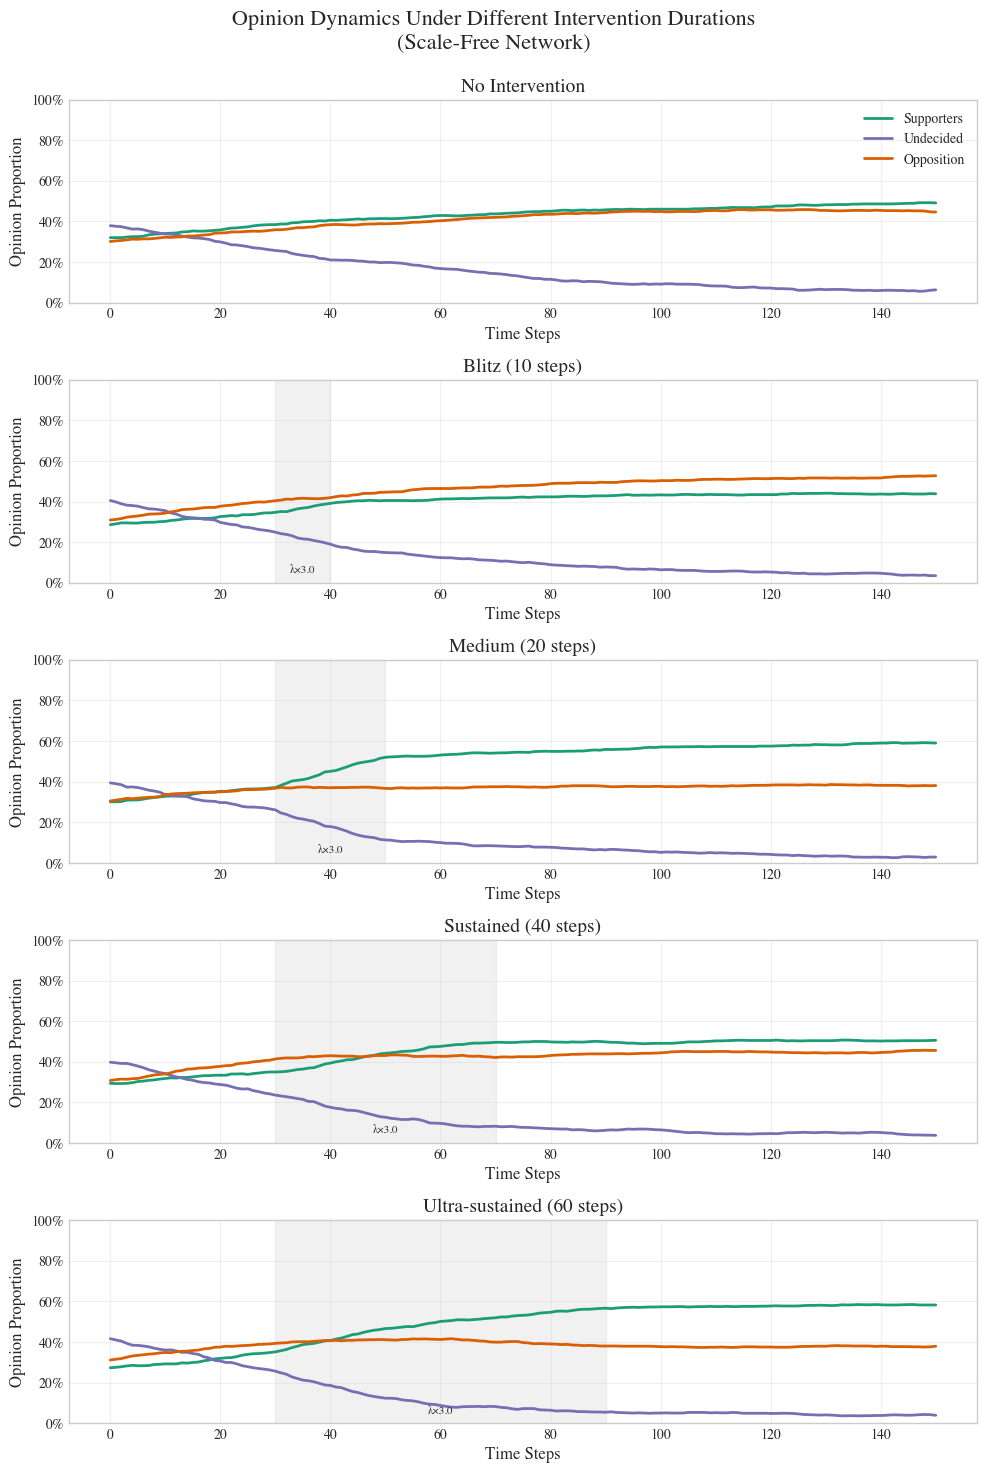

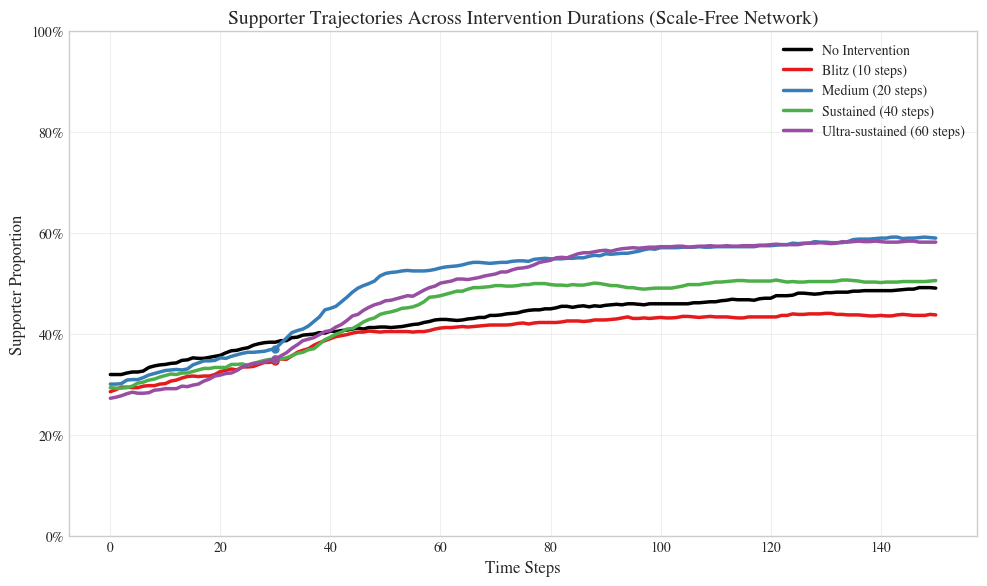


Small-world - No Intervention:
  Initial - Supporters: 0.301, Undecided: 0.392, Opposition: 0.307
  Final - Supporters: 0.463, Undecided: 0.046, Opposition: 0.491
  Change in supporters: 0.162

Small-world - Blitz (10 steps):
  Initial - Supporters: 0.318, Undecided: 0.400, Opposition: 0.282
  Final - Supporters: 0.534, Undecided: 0.030, Opposition: 0.436
  Change in supporters: 0.216

Small-world - Medium (20 steps):
  Initial - Supporters: 0.307, Undecided: 0.404, Opposition: 0.289
  Final - Supporters: 0.576, Undecided: 0.036, Opposition: 0.388
  Change in supporters: 0.269

Small-world - Sustained (40 steps):
  Initial - Supporters: 0.293, Undecided: 0.407, Opposition: 0.300
  Final - Supporters: 0.550, Undecided: 0.027, Opposition: 0.423
  Change in supporters: 0.257

Small-world - Ultra-sustained (60 steps):
  Initial - Supporters: 0.311, Undecided: 0.384, Opposition: 0.305
  Final - Supporters: 0.594, Undecided: 0.042, Opposition: 0.364
  Change in supporters: 0.283


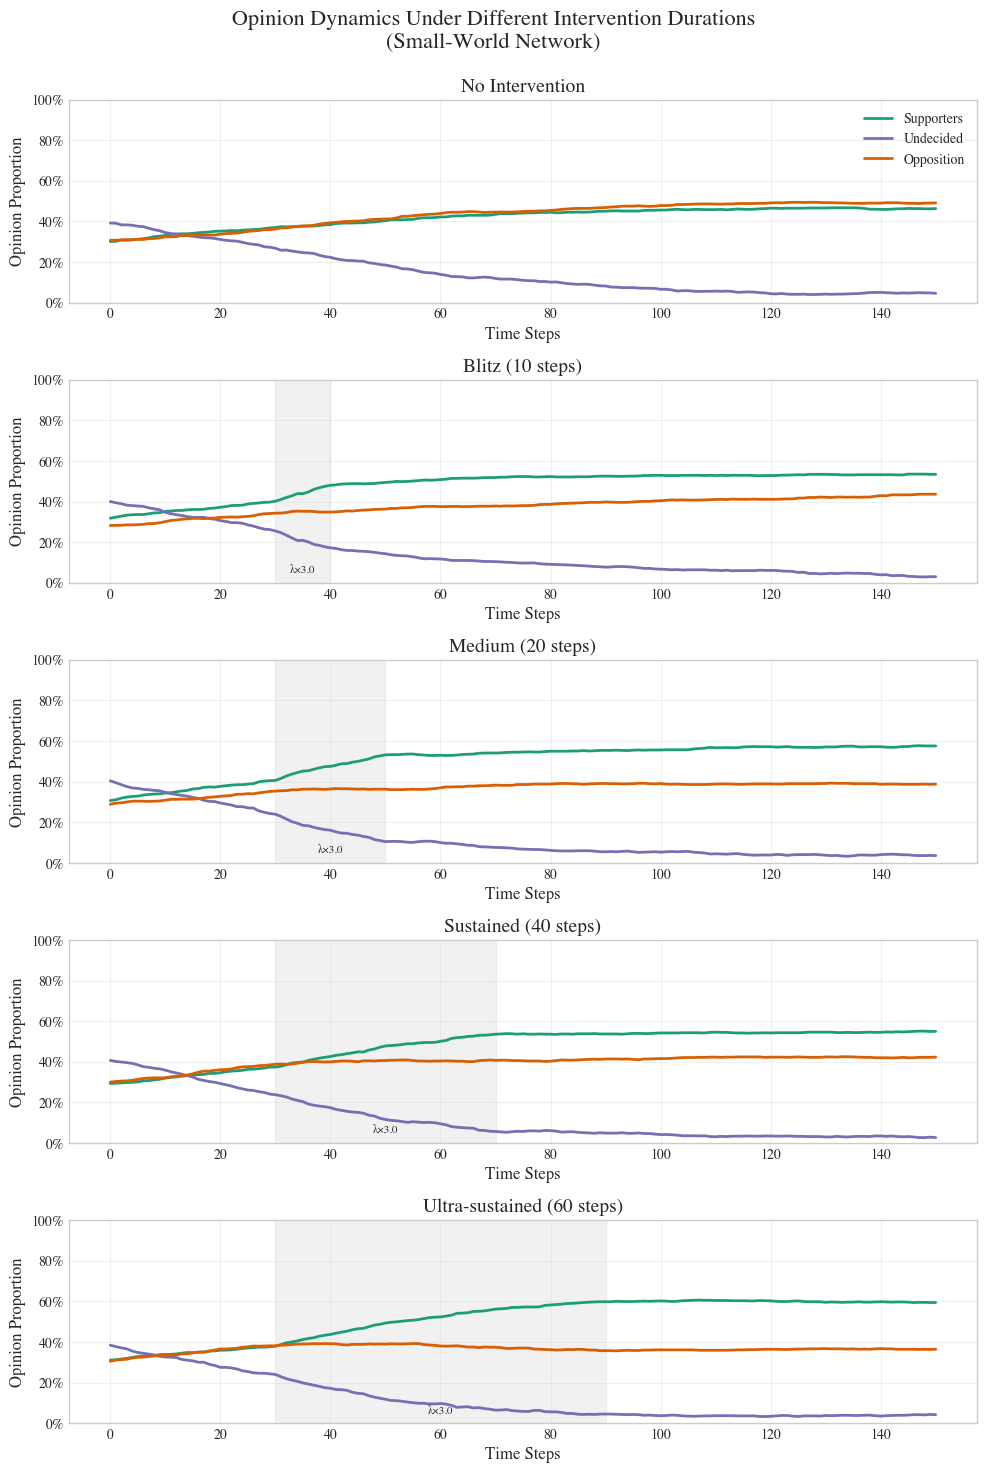

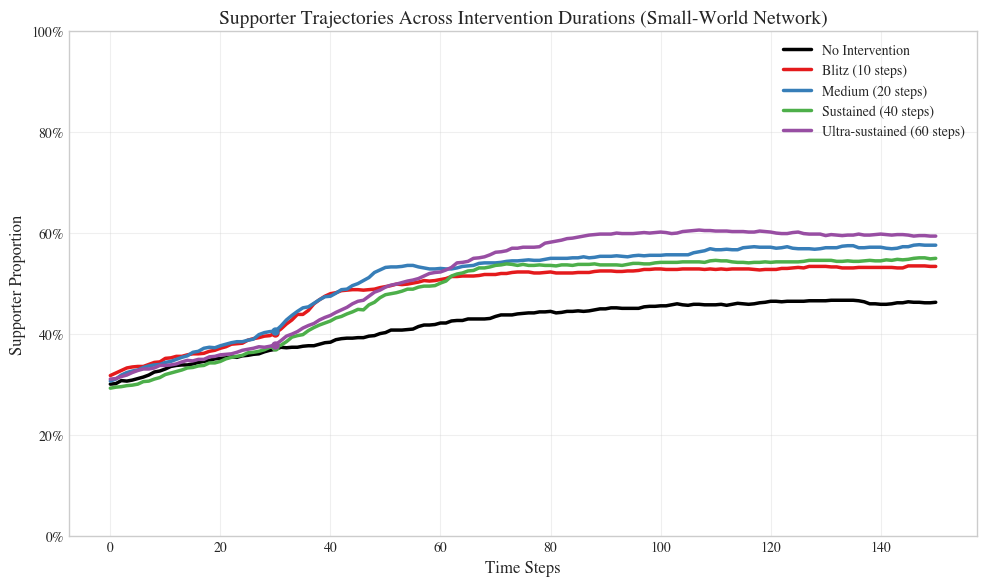


Random - No Intervention:
  Initial - Supporters: 0.285, Undecided: 0.414, Opposition: 0.301
  Final - Supporters: 0.444, Undecided: 0.052, Opposition: 0.504
  Change in supporters: 0.159

Random - Blitz (10 steps):
  Initial - Supporters: 0.283, Undecided: 0.392, Opposition: 0.325
  Final - Supporters: 0.470, Undecided: 0.044, Opposition: 0.486
  Change in supporters: 0.187

Random - Medium (20 steps):
  Initial - Supporters: 0.289, Undecided: 0.422, Opposition: 0.289
  Final - Supporters: 0.544, Undecided: 0.029, Opposition: 0.427
  Change in supporters: 0.255

Random - Sustained (40 steps):
  Initial - Supporters: 0.318, Undecided: 0.390, Opposition: 0.292
  Final - Supporters: 0.646, Undecided: 0.038, Opposition: 0.316
  Change in supporters: 0.328

Random - Ultra-sustained (60 steps):
  Initial - Supporters: 0.291, Undecided: 0.408, Opposition: 0.301
  Final - Supporters: 0.605, Undecided: 0.035, Opposition: 0.360
  Change in supporters: 0.314


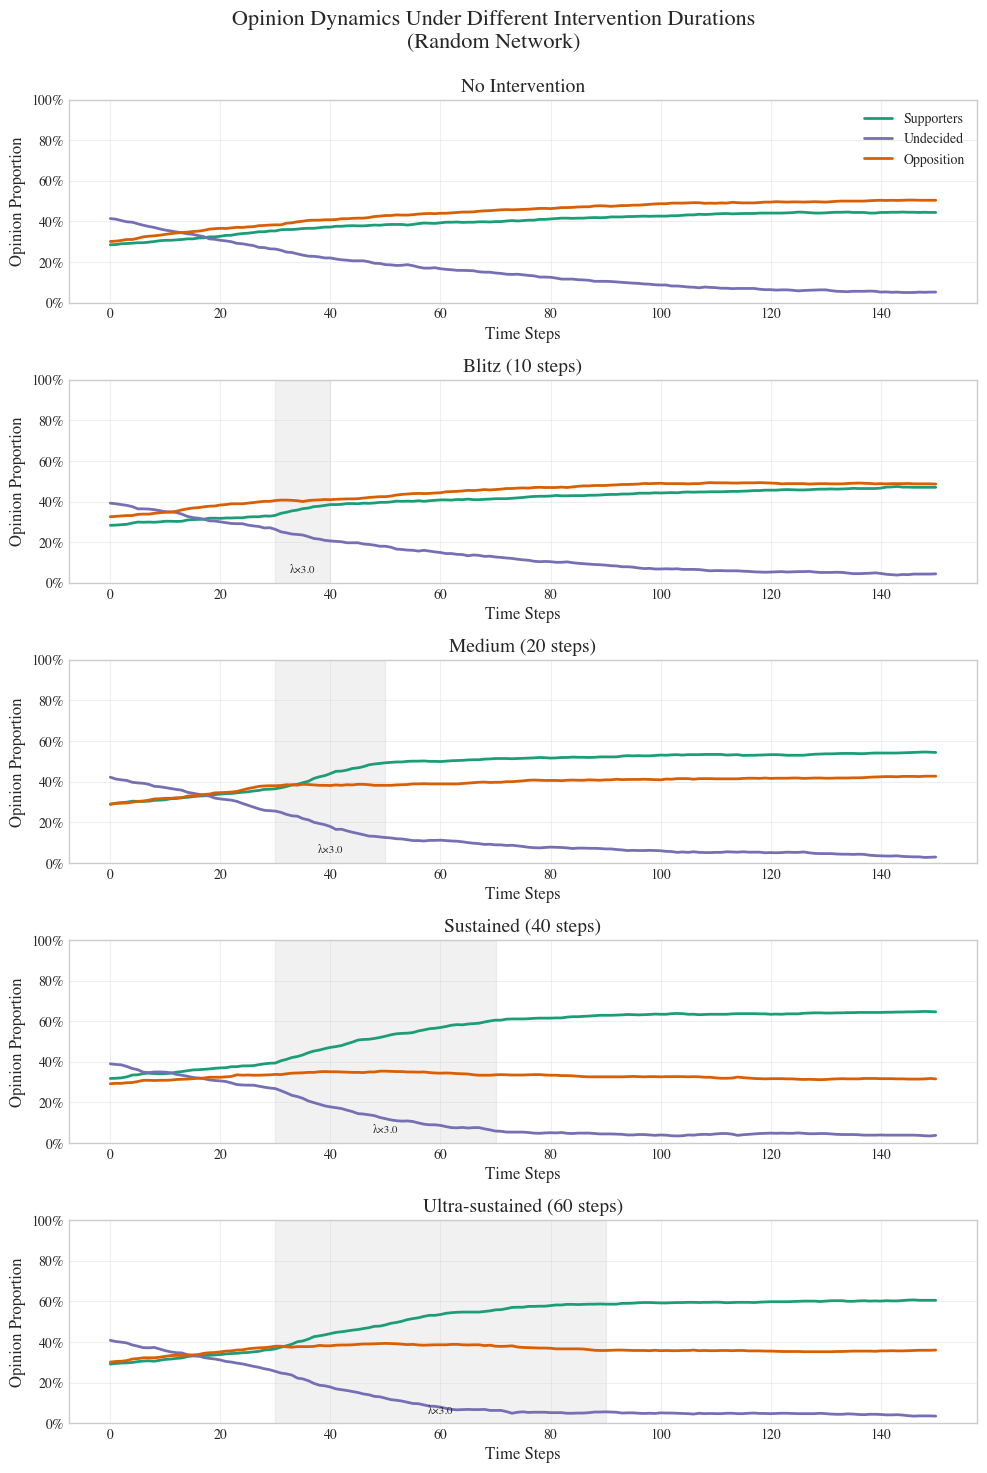

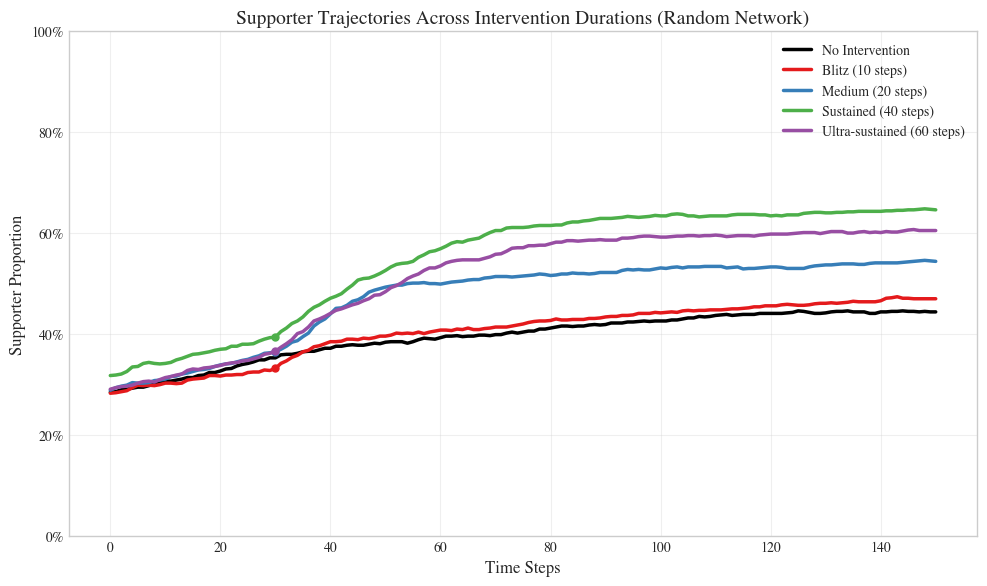

In [63]:
# Iterate over each network type
for network_type in network_types:
    patterns = list(results[network_type].keys())
    
    # Plot 1: Opinion dynamics for each pattern within this network
    fig, axes = plt.subplots(len(patterns), 1, figsize=(10, 3*len(patterns)))
    if len(patterns) == 1:  # Handle case of single pattern
        axes = [axes]
    
    for i, pattern in enumerate(patterns):
        if pattern not in results[network_type]:
            continue  # Skip if pattern not found
            
        history = results[network_type][pattern]['history']
        
        # Extract opinions (assuming key 0 = Supporter, key 1 = Undecided, key 2 = Opposition)
        supporters = [h[0] for h in history]
        undecided = [h[1] for h in history]
        opposition = [h[2] for h in history]
        
        # Plot all opinion states
        axes[i].plot(supporters, label="Supporters", color=SUPPORTER_COLOR, linewidth=2)
        axes[i].plot(undecided, label="Undecided", color=UNDECIDED_COLOR, linewidth=2)
        axes[i].plot(opposition, label="Opposition", color=OPPOSITION_COLOR, linewidth=2)
        
        # Highlight intervention periods
        if 'shock_schedule' in results[network_type][pattern]:
            for shock in results[network_type][pattern]['shock_schedule']:
                if 'start' in shock and 'end' in shock:
                    axes[i].axvspan(shock['start'], shock['end'], color='lightgray', alpha=0.3)
                    # Add intensity annotation if available
                    if 'lambda_s_factor' in shock:
                        axes[i].text((shock['start'] + shock['end'])/2, 0.05, 
                                    f"λ×{shock['lambda_s_factor']:.1f}", 
                                    horizontalalignment='center', fontsize=8)
        
        axes[i].set_title(f"{pattern}", fontweight='bold')
        axes[i].set_xlabel('Time Steps')
        axes[i].set_ylabel('Opinion Proportion')
        axes[i].set_ylim(0, 1)
        axes[i].grid(True, alpha=0.3)
        axes[i].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        
        # Add legend to first subplot only
        if i == 0:
            axes[i].legend()
        
        # Print key metrics
        print(f"\n{network_type} - {pattern}:")
        print(f"  Initial - Supporters: {supporters[0]:.3f}, Undecided: {undecided[0]:.3f}, Opposition: {opposition[0]:.3f}")
        print(f"  Final - Supporters: {supporters[-1]:.3f}, Undecided: {undecided[-1]:.3f}, Opposition: {opposition[-1]:.3f}")
        print(f"  Change in supporters: {supporters[-1] - supporters[0]:.3f}")
    
    plt.suptitle(f'Opinion Dynamics Under Different Intervention Durations\n({network_type.title()} Network)', 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.savefig(f"blitz_vs_sustained_{network_type}_dynamics.pdf")
    plt.show()
    
    # Plot 2: Direct comparison of supporter trajectories
    plt.figure(figsize=(10, 6))
    
    for pattern in patterns:
        if pattern not in results[network_type]:
            continue  # Skip if pattern not found
            
        history = results[network_type][pattern]['history']
        supporters = [h[0] for h in history]
        
        # Use consistent color for each pattern
        color = PATTERN_COLORS.get(pattern, 'gray')
        plt.plot(supporters, label=pattern, linewidth=2.5, color=color)
        
        # Highlight intervention periods
        if 'shock_schedule' in results[network_type][pattern]:
            for shock in results[network_type][pattern]['shock_schedule']:
                if 'start' in shock and 'end' in shock:
                    # Add small marker at start of intervention
                    plt.plot(shock['start'], supporters[shock['start']], 'o', color=color, markersize=5)
    
    plt.xlabel('Time Steps')
    plt.ylabel('Supporter Proportion')
    plt.title(f'Supporter Trajectories Across Intervention Durations ({network_type.title()} Network)', 
             fontweight='bold')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    plt.tight_layout()
    plt.savefig(f"blitz_vs_sustained_{network_type}_trajectories.pdf")
    plt.show()

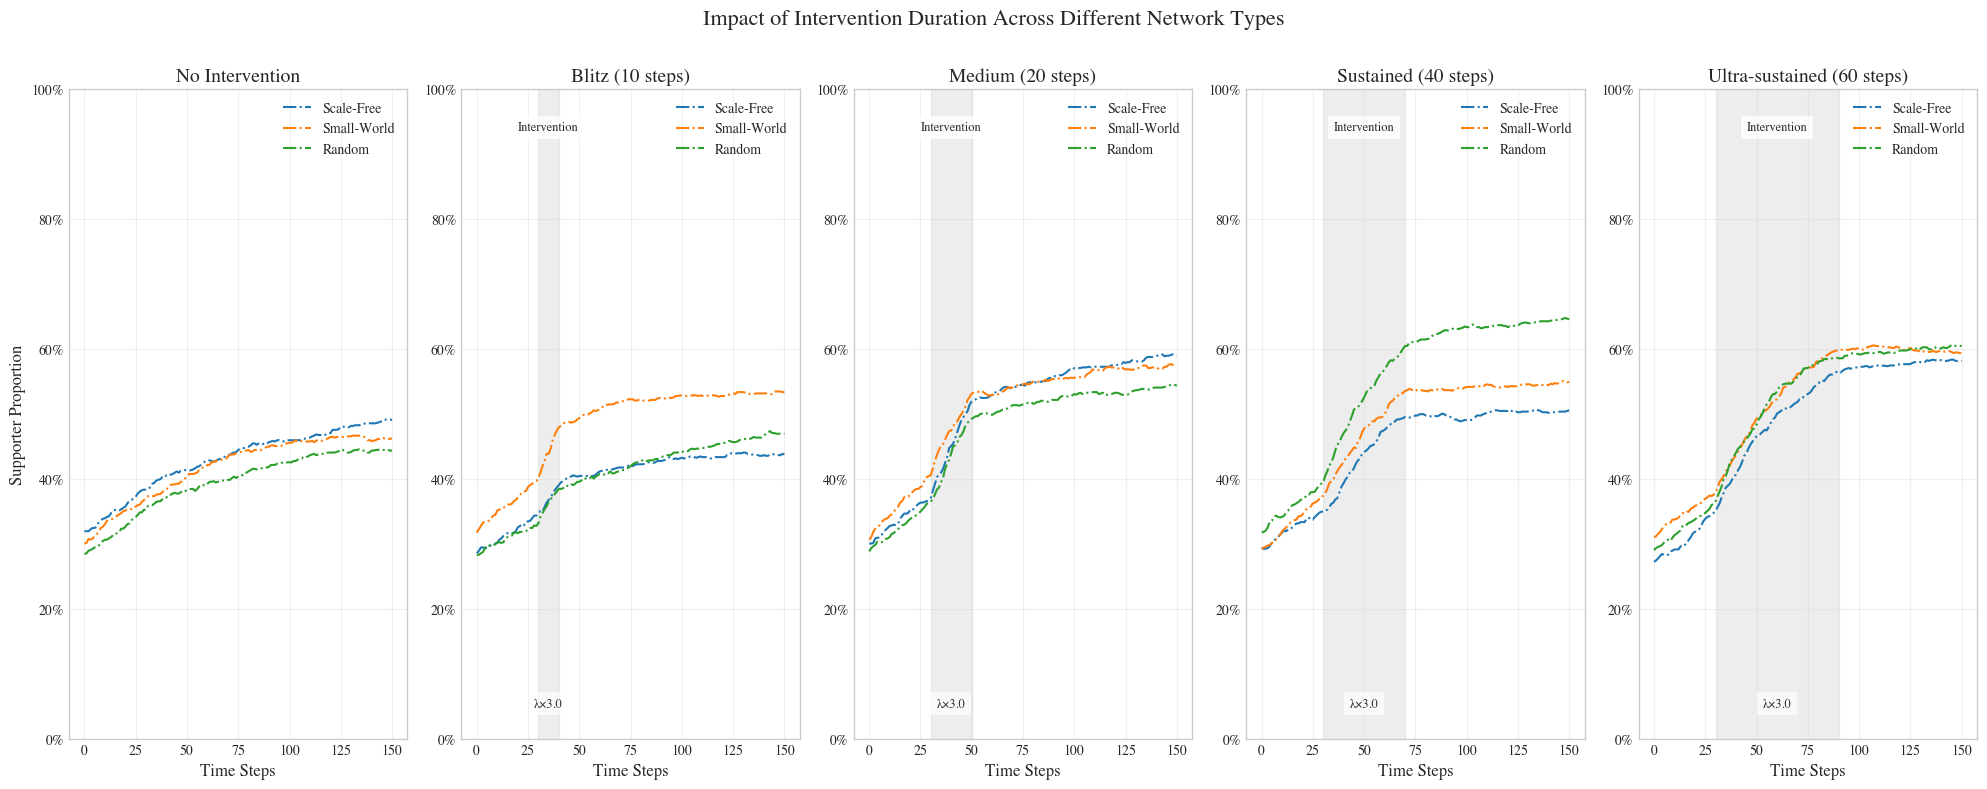

In [87]:
# Define colors for intervention shading
INTERVENTION_COLOR = 'lightgray'

# Create comparison plot across all network types
plt.figure(figsize=(20, 10))

# Create a grid of subplots - one per pattern
patterns_across_networks = set()
for network in results:
    patterns_across_networks.update(results[network].keys())

patterns_list = [
    'No Intervention',
    'Blitz (10 steps)',
    'Medium (20 steps)',
    'Sustained (40 steps)',
    'Ultra-sustained (60 steps)'
]
n_patterns = len(patterns_list)
# n_cols = min(3, n_patterns)
# n_rows = (n_patterns + n_cols - 1) // n_cols  # Ceiling division
n_rows = 1
n_cols = 5

# Create the subplots
for i, pattern in enumerate(patterns_list):
    ax = plt.subplot(n_rows, n_cols, i+1)
    
    # Plot each network type
    handles = []
    labels = []
    
    for network_type in network_types:
        if pattern in results[network_type]:
            history = results[network_type][pattern]['history']
            supporters = [h[0] for h in history]
            
            # Use different line styles for different networks
            if network_type == 'scale-free':
                linestyle = '-'
            elif network_type == 'small-world':
                linestyle = '--'
            else:  # random
                linestyle = '-.'
                
            line, = ax.plot(supporters, label=network_type.title(), 
                          linestyle=linestyle, linewidth=1.5)
            
            # Only collect handles from the first subplot
            if i == 0:
                handles.append(line)
                labels.append(network_type.title())
    
    # Add shock period highlight if available
    if pattern != 'No Intervention':
        # Try to find shock schedule
        for net in network_types:
            if pattern in results[net] and 'shock_schedule' in results[net][pattern]:
                for shock in results[net][pattern]['shock_schedule']:
                    if 'start' in shock and 'end' in shock:
                        # Shade the intervention region
                        ax.axvspan(shock['start'], shock['end'], 
                                  color=INTERVENTION_COLOR, alpha=0.4, zorder=1)
                        
                        # Add label for intervention
                        ax.text((shock['start'] + shock['end'])/2, 0.95, 
                               'Intervention', 
                               horizontalalignment='center', 
                               verticalalignment='top',
                               fontsize=9,
                               bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
                        
                        # Add intensity annotation
                        if 'lambda_s_factor' in shock:
                            ax.text((shock['start'] + shock['end'])/2, 0.05, 
                                   f"λ×{shock['lambda_s_factor']:.1f}", 
                                   horizontalalignment='center', fontsize=9,
                                   bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
                break

    # Style the subplot
    ax.set_title(f"{pattern}", fontweight='bold')
    ax.set_xlabel('Time Steps')
    
    # Only add y-label to the first subplot
    if i == 0:
        ax.set_ylabel('Supporter Proportion')
        
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.legend()

# First adjust for a tight layout
plt.tight_layout()

# Add the main title with some space above the plots
plt.suptitle('Impact of Intervention Duration Across Different Network Types', 
           fontsize=16, fontweight='bold', y=0.98)

# This is key to ensure the legend appears properly
plt.subplots_adjust(bottom=0.25, top=0.9)

# Add the shared legend in the space we created at the bottom
# Use a clearly visible position and larger font size
legend = fig.legend(legend_handles, legend_labels,
                  loc='lower center',
                  bbox_to_anchor=(0.5, 0.08),  # Position farther up from bottom
                  ncol=len(network_types),
                  frameon=True,
                  fontsize=12,
                  title="Network Types",
                  title_fontsize=14)

# Ensure the legend is more prominent
legend.get_frame().set_linewidth(1.0)
legend.get_frame().set_edgecolor('black')


# Save with tight bbox to ensure everything is included
plt.savefig("blitz_vs_sustained_network_comparison.pdf")
plt.show()

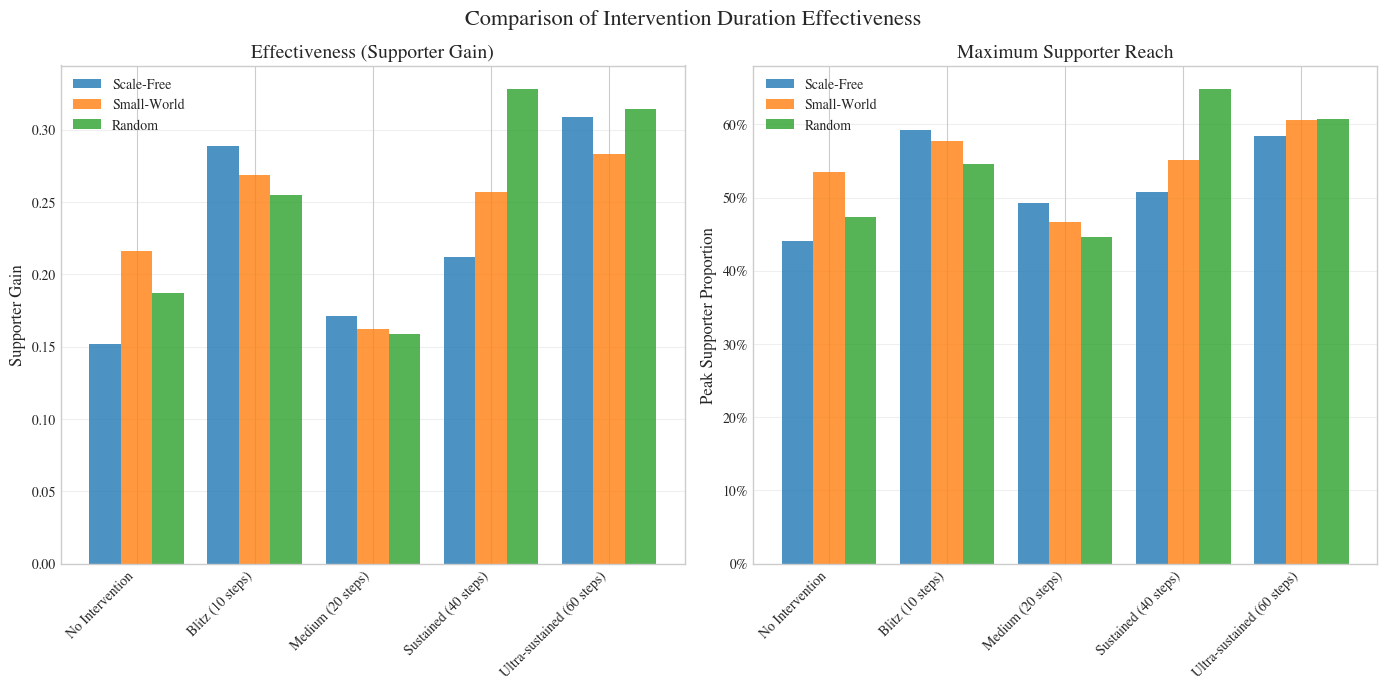

In [60]:
# Create effectiveness comparison bar chart
plt.figure(figsize=(14, 7))

# Create two subplots
ax1 = plt.subplot(1, 2, 1)  # For supporter gain
ax2 = plt.subplot(1, 2, 2)  # For peak value

# Prepare data
network_labels = []
pattern_labels = []
supporter_gains = []
peak_values = []
peak_times = []
decay_rates = []

for network_type in network_types:
    for pattern in results[network_type]:
        network_labels.append(network_type.title())
        pattern_labels.append(pattern)
        
        # Get metrics
        history = results[network_type][pattern]['history']
        supporters = [h[0] for h in history]
        initial_supp = supporters[0]
        final_supp = supporters[-1]
        
        supporter_gains.append(final_supp - initial_supp)
        
        # Get peak metrics if available
        if ('supporter_peak' in results[network_type][pattern] and 
            isinstance(results[network_type][pattern]['supporter_peak'], list) and
            len(results[network_type][pattern]['supporter_peak']) > 0):
            peak = results[network_type][pattern]['supporter_peak'][0]
            peak_values.append(peak)
            
            if ('supporter_time_to_peak' in results[network_type][pattern] and 
                isinstance(results[network_type][pattern]['supporter_time_to_peak'], list) and
                len(results[network_type][pattern]['supporter_time_to_peak']) > 0):
                peak_time = results[network_type][pattern]['supporter_time_to_peak'][0]
                peak_times.append(peak_time)
            else:
                peak_times.append(np.nan)
                
            if ('supporter_decay_rate' in results[network_type][pattern] and 
                isinstance(results[network_type][pattern]['supporter_decay_rate'], list) and
                len(results[network_type][pattern]['supporter_decay_rate']) > 0):
                decay = results[network_type][pattern]['supporter_decay_rate'][0]
                decay_rates.append(decay)
            else:
                decay_rates.append(np.nan)
        else:
            peak_values.append(np.nan)
            peak_times.append(np.nan)
            decay_rates.append(np.nan)

# Create DataFrame for easier plotting
df = pd.DataFrame({
    'Network': network_labels,
    'Pattern': pattern_labels,
    'Supporter Gain': supporter_gains,
    'Peak Value': peak_values,
    'Time to Peak': peak_times,
    'Decay Rate': decay_rates
})

# Plot supporter gain by pattern and network
networks = df['Network'].unique()
for i, network in enumerate(networks):
    network_data = df[df['Network'] == network]
    
    # Sort by pattern for consistent order
    network_data = network_data.sort_values('Pattern')
    
    # Plot with offset for each network
    x = np.arange(len(network_data))
    width = 0.8 / len(networks)  # Adjust width based on number of networks
    offset = (i - (len(networks)-1)/2) * width
    
    bars = ax1.bar(x + offset, network_data['Supporter Gain'], width, 
                  label=network, alpha=0.8)

# Configure first plot
ax1.set_ylabel('Supporter Gain')
ax1.set_title('Effectiveness (Supporter Gain)')
ax1.set_xticks(np.arange(len(df['Pattern'].unique())))
ax1.set_xticklabels(df['Pattern'].unique(), rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot peak value
has_peak_data = not np.isnan(peak_values).all()
has_decay_data = not np.isnan(decay_rates).all()

if has_peak_data:
    for i, network in enumerate(networks):
        network_data = df[df['Network'] == network]
        network_data = network_data.sort_values('Pattern')
        
        x = np.arange(len(network_data))
        width = 0.8 / len(networks)
        offset = (i - (len(networks)-1)/2) * width
        
        bars = ax2.bar(x + offset, network_data['Peak Value'], width, 
                      label=network, alpha=0.8)
    
    ax2.set_ylabel('Peak Supporter Proportion')
    ax2.set_title('Maximum Supporter Reach')
    ax2.set_xticks(np.arange(len(df['Pattern'].unique())))
    ax2.set_xticklabels(df['Pattern'].unique(), rotation=45, ha='right')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

elif has_decay_data:
    # If we don't have peak data but have decay data, plot that instead
    for i, network in enumerate(networks):
        network_data = df[df['Network'] == network]
        network_data = network_data.sort_values('Pattern')
        
        x = np.arange(len(network_data))
        width = 0.8 / len(networks)
        offset = (i - (len(networks)-1)/2) * width
        
        bars = ax2.bar(x + offset, network_data['Decay Rate'], width, 
                      label=network, alpha=0.8)
    
    ax2.set_ylabel('Decay Rate After Peak')
    ax2.set_title('Opinion Persistence')
    ax2.set_xticks(np.arange(len(df['Pattern'].unique())))
    ax2.set_xticklabels(df['Pattern'].unique(), rotation=45, ha='right')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
else:
    # If neither peak nor decay data is available, plot final supporter proportion
    for i, network in enumerate(networks):
        network_data = df[df['Network'] == network]
        network_data = network_data.sort_values('Pattern')
        
        x = np.arange(len(network_data))
        width = 0.8 / len(networks)
        offset = (i - (len(networks)-1)/2) * width
        
        # Extract history and get final values
        final_supporters = []
        for idx, row in network_data.iterrows():
            net = row['Network'].lower()
            pat = row['Pattern']
            history = results[net][pat]['history']
            supporters = [h[0] for h in history]
            final_supporters.append(supporters[-1])
        
        bars = ax2.bar(x + offset, final_supporters, width, 
                      label=network, alpha=0.8)
    
    ax2.set_ylabel('Final Supporter Proportion')
    ax2.set_title('Final Supporter Proportion')
    ax2.set_xticks(np.arange(len(df['Pattern'].unique())))
    ax2.set_xticklabels(df['Pattern'].unique(), rotation=45, ha='right')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.suptitle('Comparison of Intervention Duration Effectiveness', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("blitz_vs_sustained_effectiveness.pdf")
plt.show()


In [59]:
# Create summary table
summary_rows = []

for network_type in network_types:
    for pattern in results[network_type]:
        history = results[network_type][pattern]['history']
        supporters = [h[0] for h in history]
        
        # Calculate metrics
        initial_supp = supporters[0]
        final_supp = supporters[-1]
        supp_gain = final_supp - initial_supp
        
        # Get peak metrics if available
        peak_supp = 'N/A'
        peak_time = 'N/A'
        decay_rate = 'N/A'
        
        if 'supporter_peak' in results[network_type][pattern] and len(results[network_type][pattern]['supporter_peak']) > 0:
            peak_supp = f"{results[network_type][pattern]['supporter_peak'][0]:.3f}"
            
            if 'supporter_time_to_peak' in results[network_type][pattern] and len(results[network_type][pattern]['supporter_time_to_peak']) > 0:
                peak_time = int(results[network_type][pattern]['supporter_time_to_peak'][0])
                
            if 'supporter_decay_rate' in results[network_type][pattern] and len(results[network_type][pattern]['supporter_decay_rate']) > 0:
                decay_rate = f"{results[network_type][pattern]['supporter_decay_rate'][0]:.5f}"
        
        # Get shock details
        shock_count = len(results[network_type][pattern].get('shock_schedule', []))
        shock_duration = sum([shock['end'] - shock['start'] for shock in results[network_type][pattern].get('shock_schedule', [])])
        shock_intensity = 'N/A'
        if shock_count > 0 and 'lambda_s_factor' in results[network_type][pattern]['shock_schedule'][0]:
            shock_intensity = f"{results[network_type][pattern]['shock_schedule'][0]['lambda_s_factor']:.2f}"
        
        summary_rows.append({
            'Network': network_type.title(),
            'Pattern': pattern,
            'Initial Supporters': f"{initial_supp:.3f}",
            'Final Supporters': f"{final_supp:.3f}",
            'Supporter Gain': f"{supp_gain:.3f}",
            'Peak Supporters': peak_supp,
            'Time to Peak': peak_time,
            'Decay Rate': decay_rate,
            'Intervention Duration': shock_duration,
            'Intensity': shock_intensity
        })

# Create DataFrame and display
summary_df = pd.DataFrame(summary_rows)
display(summary_df)

,Network,Pattern,Initial Supporters,Final Supporters,Supporter Gain,Peak Supporters,Time to Peak,Decay Rate,Intervention Duration,Intensity
0,Scale-Free,No Intervention,0.320,0.491,0.171,0.492,147,N/A,0,N/A
1,Scale-Free,Blitz (10 steps),0.286,0.438,0.152,0.441,130,-0.00010,10,3.00
2,Scale-Free,Medium (20 steps),0.301,0.590,0.289,0.592,142,N/A,20,3.00
3,Scale-Free,Sustained (40 steps),0.294,0.506,0.212,0.507,121,-0.00002,40,3.00
4,Scale-Free,Ultra-sustained (60 steps),0.273,0.582,0.309,0.584,136,-0.00009,60,3.00
5,Small-World,No Intervention,0.301,0.463,0.162,0.467,131,-0.00027,0,N/A
6,Small-World,Blitz (10 steps),0.318,0.534,0.216,0.535,145,N/A,10,3.00
7,Small-World,Medium (20 steps),0.307,0.576,0.269,0.577,147,N/A,20,3.00
8,Small-World,Sustained (40 steps),0.293,0.550,0.257,0.551,147,N/A,40,3.00
9,Small-World,Ultra-sustained (60 steps),0.311,0.594,0.283,0.606,107,-0.00026,60,3.00


# Intervention Pattern

In [89]:
# Pattern-specific colors (colorblind-friendly)
PATTERN_COLORS = {
    'No Intervention': '#000000',       # black
    'Blitz': '#e41a1c',                 # red
    'Sustained': '#377eb8',             # blue
    'Pulsed': '#4daf4a',                # green
    'Early Blitz + Late Reinforcement': '#984ea3'  # purple
}

In [90]:
# Load the experiment results
pkl_path = "/Users/jessebafernando/Dropbox/NetSci/dynamicalprocesses/final_proj/results/intervention_pattern/intervention_pattern_20250411_142340_n_nodes_1000_total_steps_150.pkl"
with open(pkl_path, 'rb') as f:
    data = pickle.load(f)

# Load summary json
summary_path = "/Users/jessebafernando/Dropbox/NetSci/dynamicalprocesses/final_proj/results/intervention_pattern_summary.json"
with open(summary_path, 'r') as f:
    summary = json.load(f)

# Extract results
results = data['results']
patterns = list(results.keys())


In [91]:
# First, check the data structure to ensure correct interpretation
if len(patterns) > 0:
    first_pattern = patterns[0]
    first_history = results[first_pattern]['history']
    first_timepoint = first_history[0]
    print(f"Data structure check - first timepoint: {first_timepoint}")
    print(f"Available patterns: {patterns}")


Data structure check - first timepoint: {0: 0.299, 1: 0.42, 2: 0.281}
Available patterns: ['No Intervention', 'Blitz', 'Sustained', 'Pulsed', 'Early Blitz + Late Reinforcement']



No Intervention:
  Initial - Supporters: 0.299, Undecided: 0.420, Opposition: 0.281
  Final - Supporters: 0.504, Undecided: 0.035, Opposition: 0.461
  Change in supporters: 0.205

Blitz:
  Initial - Supporters: 0.299, Undecided: 0.407, Opposition: 0.294
  Final - Supporters: 0.557, Undecided: 0.041, Opposition: 0.402
  Change in supporters: 0.258

Sustained:
  Initial - Supporters: 0.306, Undecided: 0.402, Opposition: 0.292
  Final - Supporters: 0.576, Undecided: 0.045, Opposition: 0.379
  Change in supporters: 0.270

Pulsed:
  Initial - Supporters: 0.305, Undecided: 0.417, Opposition: 0.278
  Final - Supporters: 0.601, Undecided: 0.043, Opposition: 0.356
  Change in supporters: 0.296

Early Blitz + Late Reinforcement:
  Initial - Supporters: 0.309, Undecided: 0.391, Opposition: 0.300
  Final - Supporters: 0.578, Undecided: 0.028, Opposition: 0.394
  Change in supporters: 0.269


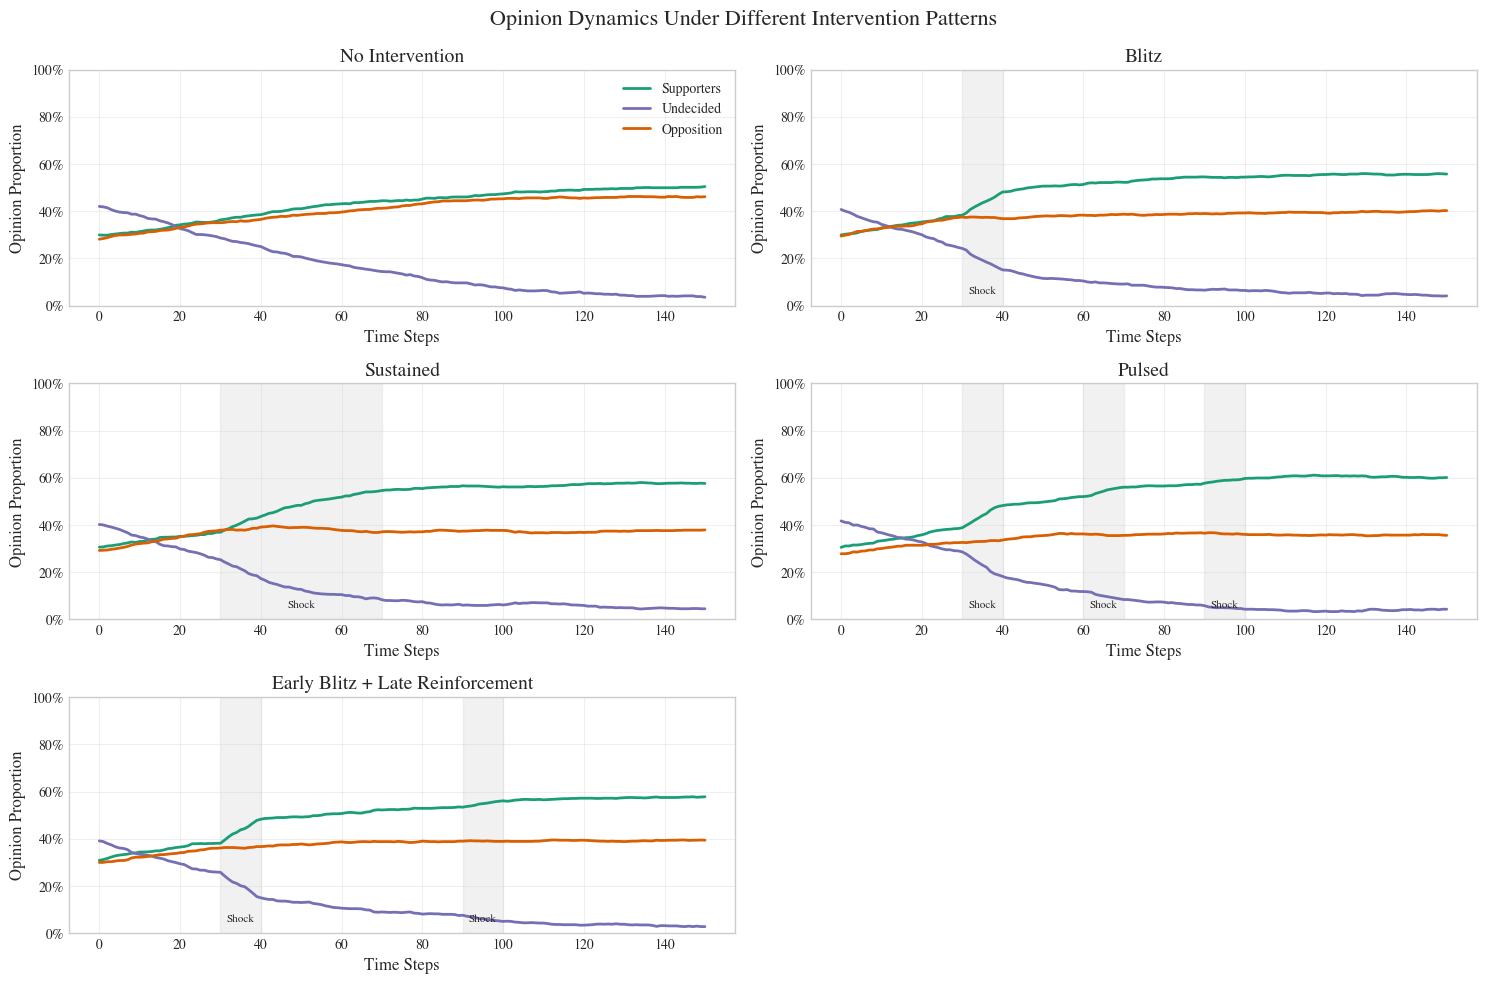

In [92]:
# Create main figure for opinion dynamics across patterns
plt.figure(figsize=(15, 10))

# Create subplots for each pattern
for i, pattern in enumerate(patterns):
    ax = plt.subplot(3, 2, i+1) if len(patterns) <= 6 else plt.subplot(4, 2, i+1)
    
    history = results[pattern]['history']
    
    # Extract opinions using correct mapping based on data inspection
    # Assuming key 0 = Supporter, key 1 = Undecided, key 2 = Opposition
    supporters = [h[0] for h in history]
    undecided = [h[1] for h in history]
    opposition = [h[2] for h in history]
    
    # Plot all opinion states
    ax.plot(supporters, label="Supporters", color=SUPPORTER_COLOR, linewidth=2)
    ax.plot(undecided, label="Undecided", color=UNDECIDED_COLOR, linewidth=2)
    ax.plot(opposition, label="Opposition", color=OPPOSITION_COLOR, linewidth=2)
    
    # Highlight intervention periods
    if 'shock_schedule' in results[pattern]:
        for shock in results[pattern]['shock_schedule']:
            if 'start' in shock and 'end' in shock:
                ax.axvspan(shock['start'], shock['end'], color='lightgray', alpha=0.3)
                ax.text((shock['start'] + shock['end'])/2, 0.05, 'Shock', 
                       horizontalalignment='center', fontsize=8)
    
    ax.set_title(pattern, fontweight='bold')
    ax.set_xlabel('Time Steps')
    ax.set_ylabel('Opinion Proportion')
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    # Only add legend to first subplot to avoid clutter
    if i == 0:
        ax.legend()
    
    # Print key metrics
    print(f"\n{pattern}:")
    print(f"  Initial - Supporters: {supporters[0]:.3f}, Undecided: {undecided[0]:.3f}, Opposition: {opposition[0]:.3f}")
    print(f"  Final - Supporters: {supporters[-1]:.3f}, Undecided: {undecided[-1]:.3f}, Opposition: {opposition[-1]:.3f}")
    print(f"  Change in supporters: {supporters[-1] - supporters[0]:.3f}")

plt.suptitle('Opinion Dynamics Under Different Intervention Patterns', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig("intervention_patterns_dynamics.pdf")
plt.show()


Data structure check - first timepoint: {0: 0.299, 1: 0.42, 2: 0.281}
Patterns: ['No Intervention', 'Blitz', 'Sustained', 'Pulsed', 'Early Blitz + Late Reinforcement']


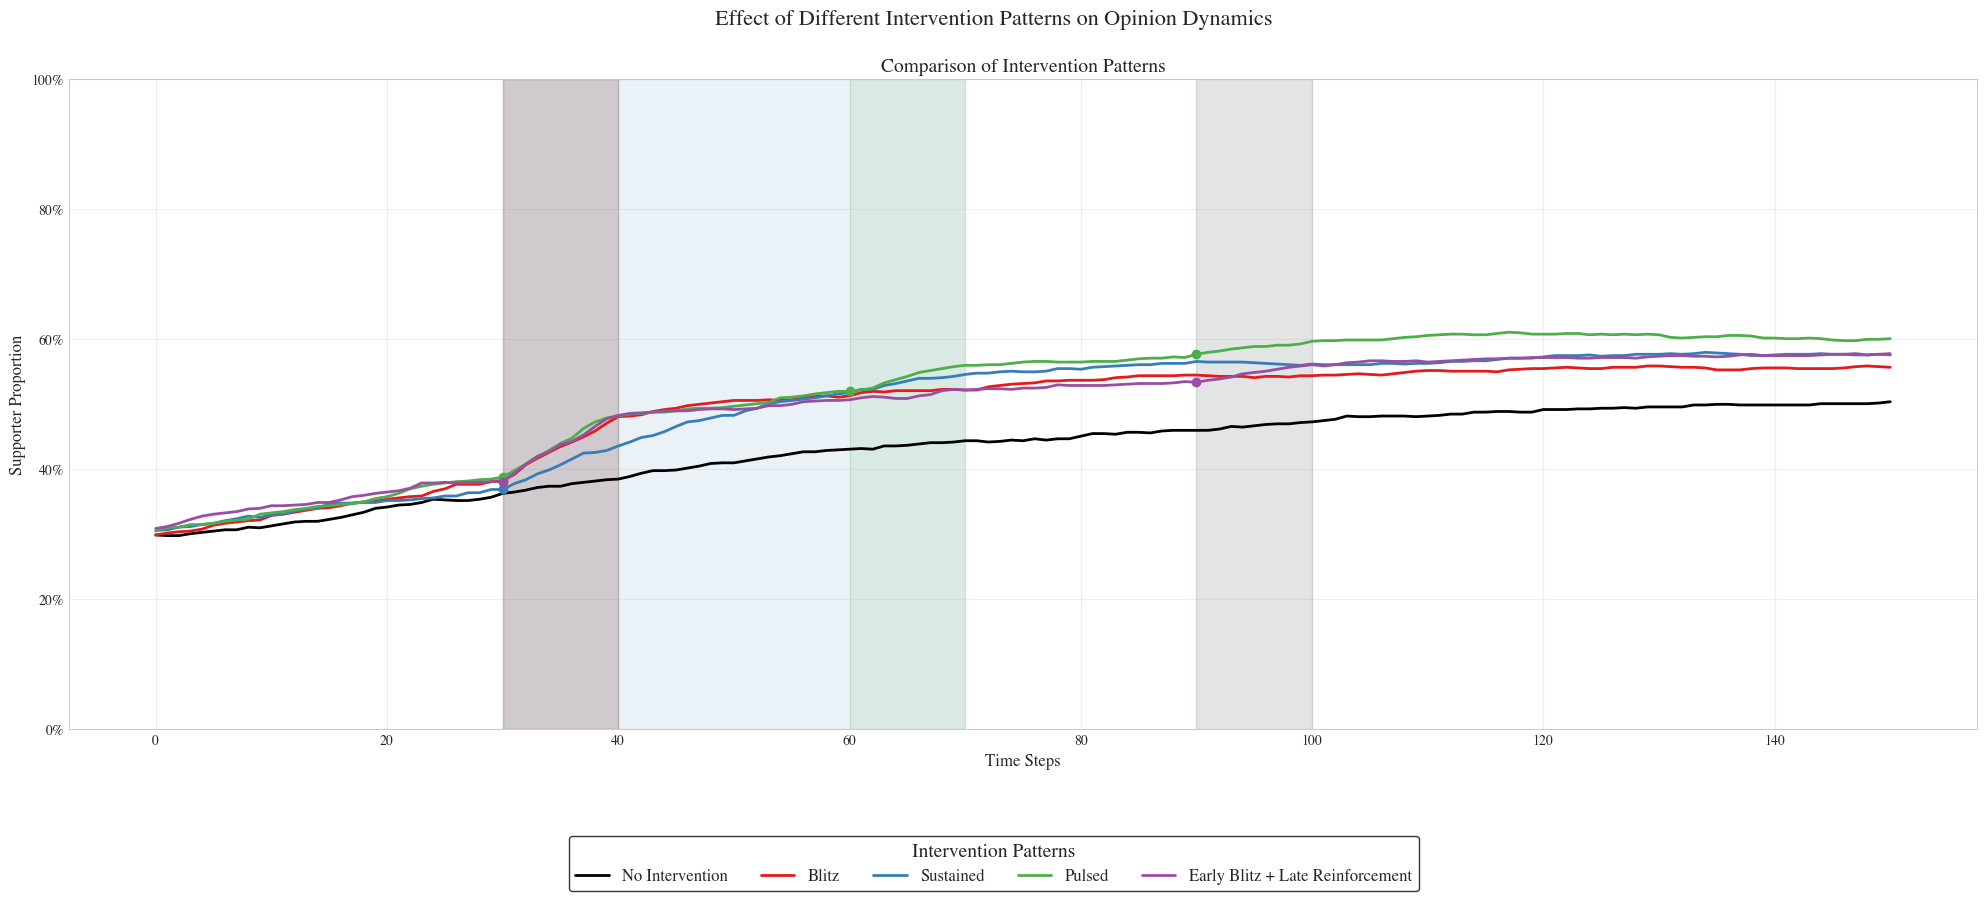

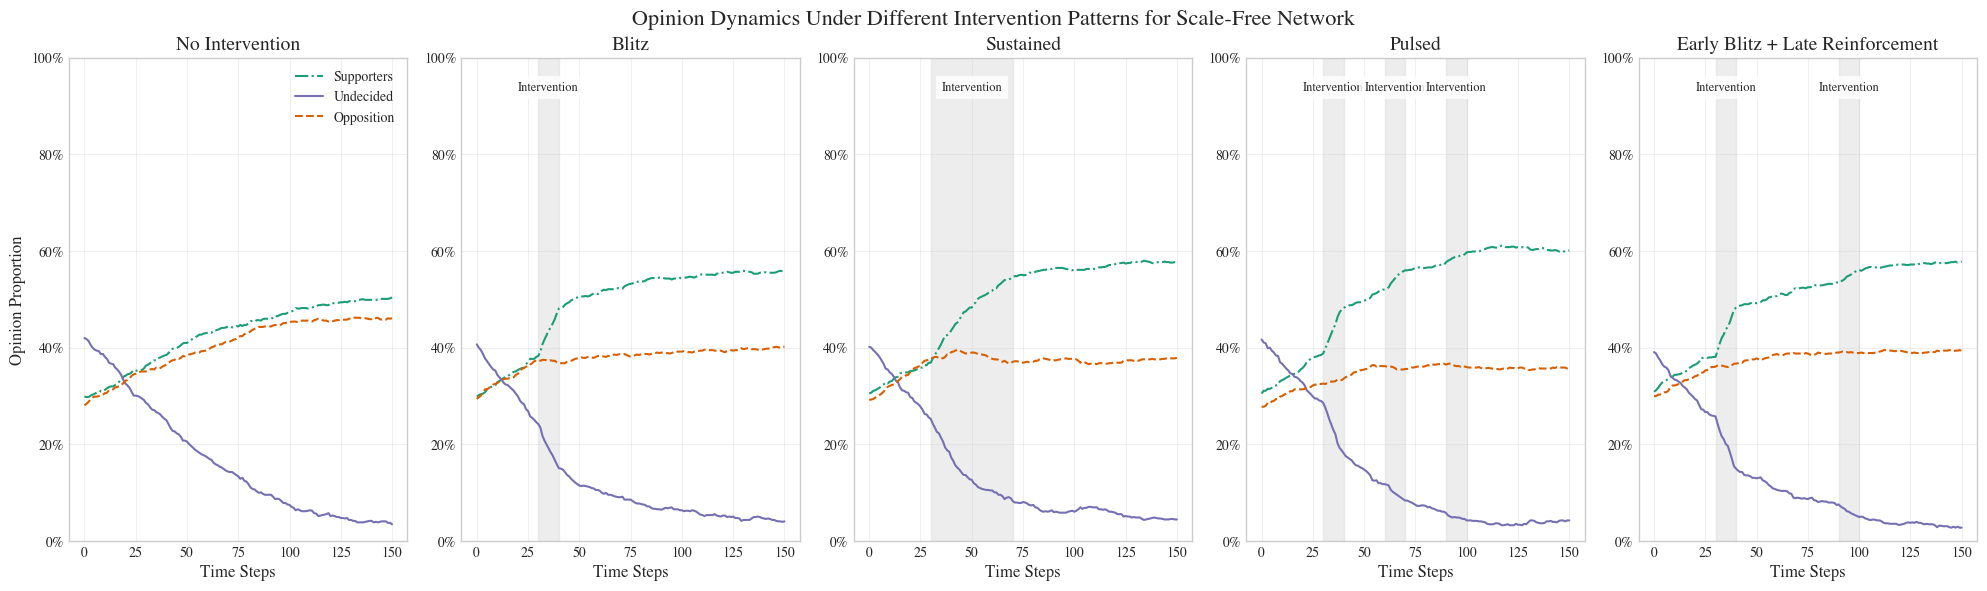

In [95]:
# Pattern-specific colors (colorblind-friendly)
PATTERN_COLORS = {
    'No Intervention': '#000000',       # black
    'Blitz': '#e41a1c',                 # red
    'Sustained': '#377eb8',             # blue
    'Pulsed': '#4daf4a',                # green
    'Early Blitz + Late Reinforcement': '#984ea3'  # purple
}

# Define colors for intervention shading
INTERVENTION_COLOR = 'lightgray'

# Define the ordered list of patterns with nicer display names
ordered_patterns = [
    'No Intervention',
    'Blitz',
    'Sustained',
    'Pulsed',
    'Early Blitz + Late Reinforcement'
]

# Filter to only include patterns that exist in the data
available_patterns = [p for p in ordered_patterns if p in patterns]

# Create figure with specific dimensions
fig = plt.figure(figsize=(20, 10))  # Increased height for legend

# Create placeholder for legend handles and labels
legend_handles = []
legend_labels = []

# Set up one subplot per network type
network_types = ['scale-free']  # Default to scale-free if not specified in data

# Determine which network type this data is for (examining the first pattern's data)
first_pattern = patterns[0]
first_history = results[first_pattern]['history']
first_point = first_history[0]
# Check data structure
print(f"Data structure check - first timepoint: {first_point}")
print(f"Patterns: {patterns}")

# Create the subplot
ax = plt.gca()

# Plot each intervention pattern
for pattern in available_patterns:
    if pattern in results:
        history = results[pattern]['history']
        
        # Extract supporter proportions (assuming key 0 = Supporter, key 1 = Undecided, key 2 = Opposition)
        supporters = [h[0] for h in history]
        
        # Use pattern-specific color
        color = PATTERN_COLORS.get(pattern, 'gray')
        
        # Plot the supporter trajectory
        line, = ax.plot(supporters, label=pattern, color=color, linewidth=2.0)
        
        # Add to legend
        legend_handles.append(line)
        legend_labels.append(pattern)
        
        # Add intervention shading if available
        if 'shock_schedule' in results[pattern]:
            for shock in results[pattern]['shock_schedule']:
                if 'start' in shock and 'end' in shock:
                    # Shade the intervention region
                    ax.axvspan(shock['start'], shock['end'], 
                              color=color, alpha=0.1, zorder=1)
                    
                    # Add a marker at the start of intervention
                    ax.plot(shock['start'], supporters[shock['start']], 'o', 
                          color=color, markersize=6)
    
# Style the subplot
ax.set_title(f"Comparison of Intervention Patterns", fontweight='bold')
ax.set_xlabel('Time Steps')
ax.set_ylabel('Supporter Proportion')
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Add a box around the plot
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.75)

# First do a tight layout for the subplots
plt.tight_layout()

# Add the main title with some space above the plots
plt.suptitle('Effect of Different Intervention Patterns on Opinion Dynamics', 
           fontsize=16, fontweight='bold', y=0.97)

# Create sufficient space for the legend
plt.subplots_adjust(bottom=0.25, top=0.9)

# Add the shared legend in the space we created at the bottom
legend = fig.legend(legend_handles, legend_labels,
                  loc='lower center',
                  bbox_to_anchor=(0.5, 0.08),
                  ncol=len(legend_handles),
                  frameon=True,
                  fontsize=12,
                  title="Intervention Patterns",
                  title_fontsize=14)

# Ensure the legend is more prominent
legend.get_frame().set_linewidth(1.0)
legend.get_frame().set_edgecolor('black')

# Save with figure directly
plt.savefig("intervention_patterns_comparison.pdf", dpi=300)

# Display the figure
plt.show()

# Let's also create a version showing all three opinion states for each pattern

# Create a multi-panel figure with one panel per intervention pattern
fig, axes = plt.subplots(1, len(available_patterns), figsize=(20, 6))

for i, pattern in enumerate(available_patterns):
    if pattern not in results:
        continue
        
    ax = axes[i]
    history = results[pattern]['history']
    
    # Extract all opinion states
    supporters = [h[0] for h in history]
    undecided = [h[1] for h in history]
    opposition = [h[2] for h in history]
    
    # Plot all opinion states
    ax.plot(supporters, label="Supporters", color='#1b9e77', linewidth=1.5, linestyle='-.')
    ax.plot(undecided, label="Undecided", color='#7570b3', linewidth=1.5, linestyle='-')
    ax.plot(opposition, label="Opposition", color='#d95f02', linewidth=1.5, linestyle='--')
    
    # Add intervention shading if available
    if 'shock_schedule' in results[pattern]:
        for shock in results[pattern]['shock_schedule']:
            if 'start' in shock and 'end' in shock:
                # Shade the intervention region
                ax.axvspan(shock['start'], shock['end'], 
                          color=INTERVENTION_COLOR, alpha=0.4, zorder=1)
                
                # Add 'Intervention' label
                ax.text((shock['start'] + shock['end'])/2, 0.95, 
                       'Intervention', 
                       horizontalalignment='center', 
                       verticalalignment='top',
                       fontsize=9,
                       bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    # Style the subplot
    ax.set_title(pattern, fontweight='bold')
    ax.set_xlabel('Time Steps')
    
    # Only add y-label to the first subplot
    if i == 0:
        ax.set_ylabel('Opinion Proportion')
        
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    # Add legend only to the first subplot
    if i == 0:
        ax.legend(loc='upper right')

plt.suptitle('Opinion Dynamics Under Different Intervention Patterns for Scale-Free Network', 
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("intervention_patterns_all_opinions.pdf", dpi=300)
plt.show()

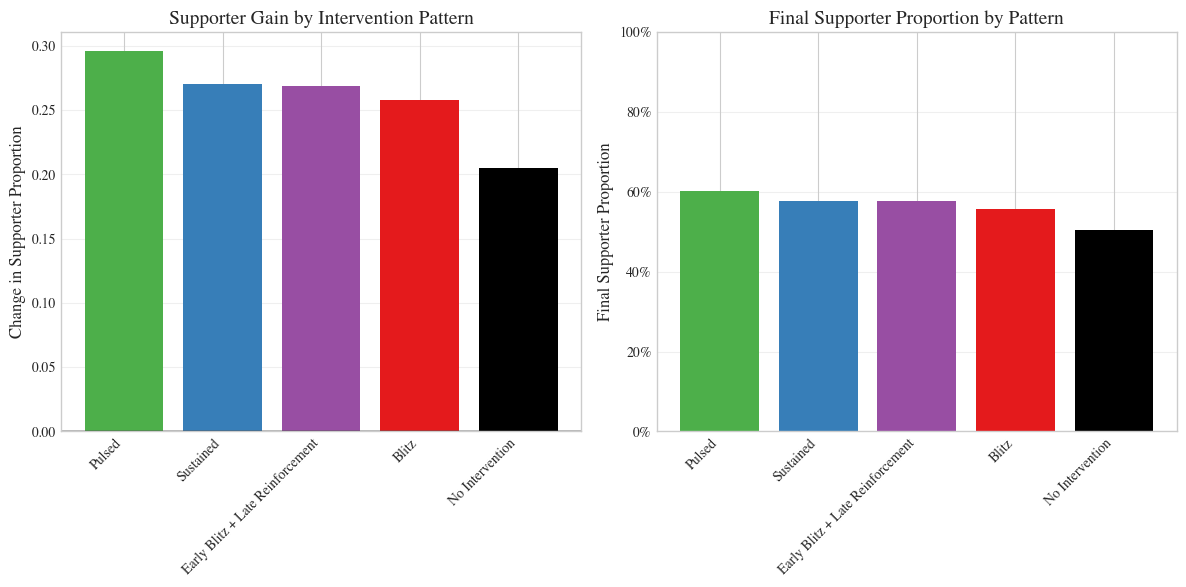

In [47]:
# Create comparison plot for final supporter proportions
plt.figure(figsize=(12, 6))

# Extract metrics for each pattern
final_supporters = []
initial_supporters = []
supporter_gains = []

for pattern in patterns:
    history = results[pattern]['history']
    supporters = [h[0] for h in history]
    final_supporters.append(supporters[-1])
    initial_supporters.append(supporters[0])
    supporter_gains.append(supporters[-1] - supporters[0])

# Sort patterns by effectiveness (supporter gain)
sorted_indices = np.argsort(supporter_gains)[::-1]  # descending
sorted_patterns = [patterns[i] for i in sorted_indices]
sorted_gains = [supporter_gains[i] for i in sorted_indices]
sorted_finals = [final_supporters[i] for i in sorted_indices]
sorted_colors = [PATTERN_COLORS.get(patterns[i], 'gray') for i in sorted_indices]

# Plot supporter gain
plt.subplot(1, 2, 1)
plt.bar(sorted_patterns, sorted_gains, color=sorted_colors)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.ylabel('Change in Supporter Proportion')
plt.title('Supporter Gain by Intervention Pattern', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Plot final supporter proportion
plt.subplot(1, 2, 2)
plt.bar(sorted_patterns, sorted_finals, color=sorted_colors)
plt.ylabel('Final Supporter Proportion')
plt.title('Final Supporter Proportion by Pattern', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.savefig("intervention_patterns_comparison.pdf")
plt.show()

In [49]:
summary_data = []

for pattern in patterns:
    history = results[pattern]['history']
    supporters = [h[0] for h in history]
    undecided = [h[1] for h in history]
    opposition = [h[2] for h in history]
    
    # Calculate metrics
    initial_supp = supporters[0]
    final_supp = supporters[-1]
    supp_gain = final_supp - initial_supp
    
    # Find peak supporter proportion and when it occurs
    peak_supp = max(supporters)
    peak_time = supporters.index(peak_supp)
    
    # Get shock schedule details
    shock_count = len(results[pattern].get('shock_schedule', []))
    
    summary_data.append({
        'Pattern': pattern,
        'Initial Supporters': f"{initial_supp:.3f}",
        'Final Supporters': f"{final_supp:.3f}",
        'Supporter Gain': f"{supp_gain:.3f}",
        'Peak Supporters': f"{peak_supp:.3f}",
        'Time to Peak': peak_time,
        'Number of Shocks': shock_count
    })

# Display table
from IPython.display import display
import pandas as pd
summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Supporter Gain', ascending=False)
display(summary_df)

,Pattern,Initial Supporters,Final Supporters,Supporter Gain,Peak Supporters,Time to Peak,Number of Shocks
3,Pulsed,0.305,0.601,0.296,0.611,117,3
2,Sustained,0.306,0.576,0.270,0.580,134,1
4,Early Blitz + Late Reinforcement,0.309,0.578,0.269,0.578,147,2
1,Blitz,0.299,0.557,0.258,0.559,129,1
0,No Intervention,0.299,0.504,0.205,0.504,150,0
